# data import and inspect

---

read data via pandas and visualization with matplotlib

In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline

In [25]:
plt.style.use('ggplot')

In [29]:
font = {"family":"Yu Mincho"}
mpl.rc('font', **font)

In [30]:
ssdse = pd.read_csv("SSDSE.csv", header=1)

In [31]:
ssdse.head()

,地域コード,都道府県,市区町村,人口総数,人口総数（男）,人口総数（女）,日本人人口,日本人人口（男）,日本人人口（女）,１５歳未満人口,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
0,R01100,北海道,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,...,9124,377,179,1317,1237,6418,2118,5015,258,25037
1,R01202,北海道,函館市,265979,120376,145603,264537,119819,144718,27131,...,1872,43,28,215,131,777,185,672,45,3494
2,R01203,北海道,小樽市,121924,54985,66939,121415,54722,66693,11171,...,821,19,12,84,79,301,106,359,21,1394
3,R01204,北海道,旭川市,339605,156402,183203,335678,154716,180962,37173,...,1840,74,36,243,179,1280,253,826,62,5405
4,R01205,北海道,室蘭市,88564,43143,45421,88203,42935,45268,9185,...,669,7,6,53,46,284,63,191,10,986


### 変数の種類

In [52]:
print(ssdse.columns.values)

['地域コード' '都道府県' '市区町村' '人口総数' '人口総数（男）' '人口総数（女）' '日本人人口' '日本人人口（男）'
 '日本人人口（女）' '１５歳未満人口' '１５歳未満人口（男）' '１５歳未満人口（女）' '１５〜６４歳人口' '１５〜６４歳人口（男）'
 '１５〜６４歳人口（女）' '６５歳以上人口' '６５歳以上人口（男）' '６５歳以上人口（女）' '７５歳以上人口' '７５歳以上人口（男）'
 '７５歳以上人口（女）' '外国人人口' '出生数' '死亡数' '転入者数' '転出者数' '世帯数' '一般世帯数' '一般世帯人員数'
 '核家族世帯数' '単独世帯数' '６５歳以上の世帯員のいる核家族世帯数' '高齢夫婦のみの世帯数' '高齢単身世帯数（６５歳以上の者１人）'
 '婚姻件数' '離婚件数' '総面積（北方地域及び竹島を除く）' '可住地面積' '事業所総数' '事業所数（農業，林業）'
 '事業所数（建設業）' '事業所数（製造業）' '事業所数（電気・ガス・熱供給・水道業）' '事業所数（情報通信業）'
 '事業所数（運輸業，郵便業）' '事業所数（卸売業，小売業）' '事業所数（金融業，保険業）' '事業所数（不動産業，物品賃貸業）'
 '事業所数（学術研究，専門・技術サービス業）' '事業所数（宿泊業，飲食サービス業）' '事業所数（生活関連サービス業，娯楽業）'
 '事業所数（教育，学習支援業）' '事業所数（医療，福祉）' '事業所数（複合サービス事業）' '事業所数（サービス業（他に分類されないもの））'
 '事業所数（公務（他に分類されるものを除く））' '第１次産業事業所数' '第２次産業事業所数' '第３次産業事業所数' '従業者総数'
 '従業者数（農業，林業）' '従業者数（建設業）' '従業者数（製造業）' '従業者数（電気・ガス・熱供給・水道業）' '従業者数（情報通信業）'
 '従業者数（運輸業，郵便業）' '従業者数（卸売業，小売業）' '従業者数（金融業，保険業）' '従業者数（不動産業，物品賃貸業）'
 '従業者数（学術研究，専門・技術サービス業）' '従業者数（宿泊業，飲食サービス業）' '従業者数（生活関連サービス業，娯楽業）'
 '従業者数（教育，学習支援業）' '従業者数（

### 試しにプロットしてみる。

In [73]:
def random_scatter(row: int = 3, col: int = 3):


    import random
    from sklearn.linear_model import LinearRegression

    fig , axes = plt.subplots(row, col, figsize=(7*col, 7*row))


    for n in range(row * col):
        area = axes[n // col][n % col]

        x, y = random.sample(list(ssdse.columns.values[3:]), 2)

        area.scatter(x=x, y=y, data=ssdse, s=12, alpha=0.3,
                     label="Data of each Pref.")
        area.set_xlabel(x)
        area.set_ylabel(y)

        reg = LinearRegression()
        reg.fit(ssdse[x].values.reshape(-1, 1), ssdse[y])

        area.plot(np.linspace(0, ssdse[x].max(), 10),
                  reg.predict(np.linspace(0, ssdse[x].max(), 10).reshape(-1, 1)),
                  color="indigo", label="Linear Regression")


        corr_coef = np.corrcoef(x=ssdse[x], y=ssdse[y])[0][1].round(3)

        area.legend(title="回帰: y={}x+({})\n相関係数: {}"
                    .format(round(reg.coef_[0], 2), round(reg.intercept_, 2), corr_coef), 
                    fontsize=12, fancybox=False)

    fig.tight_layout()

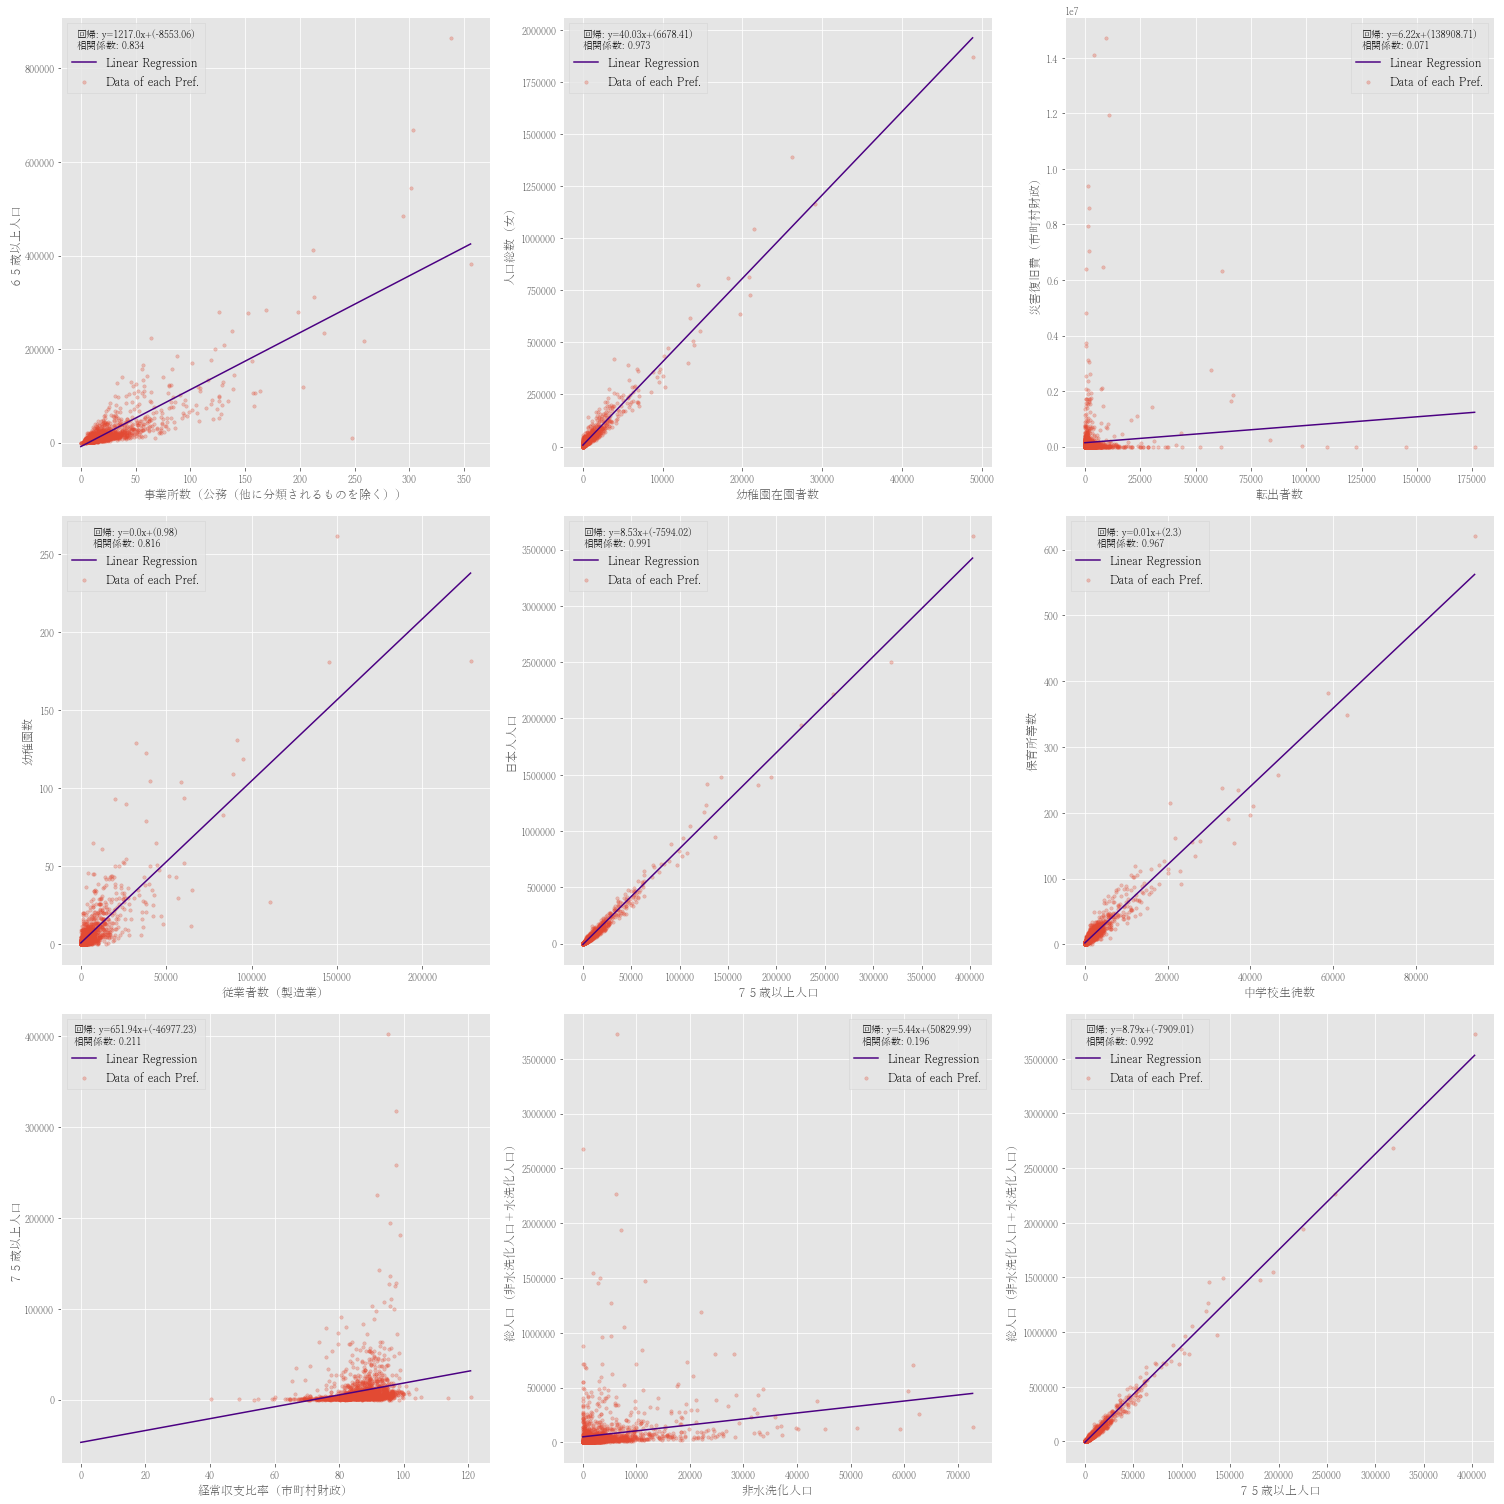

In [74]:
random_scatter(3, 3)

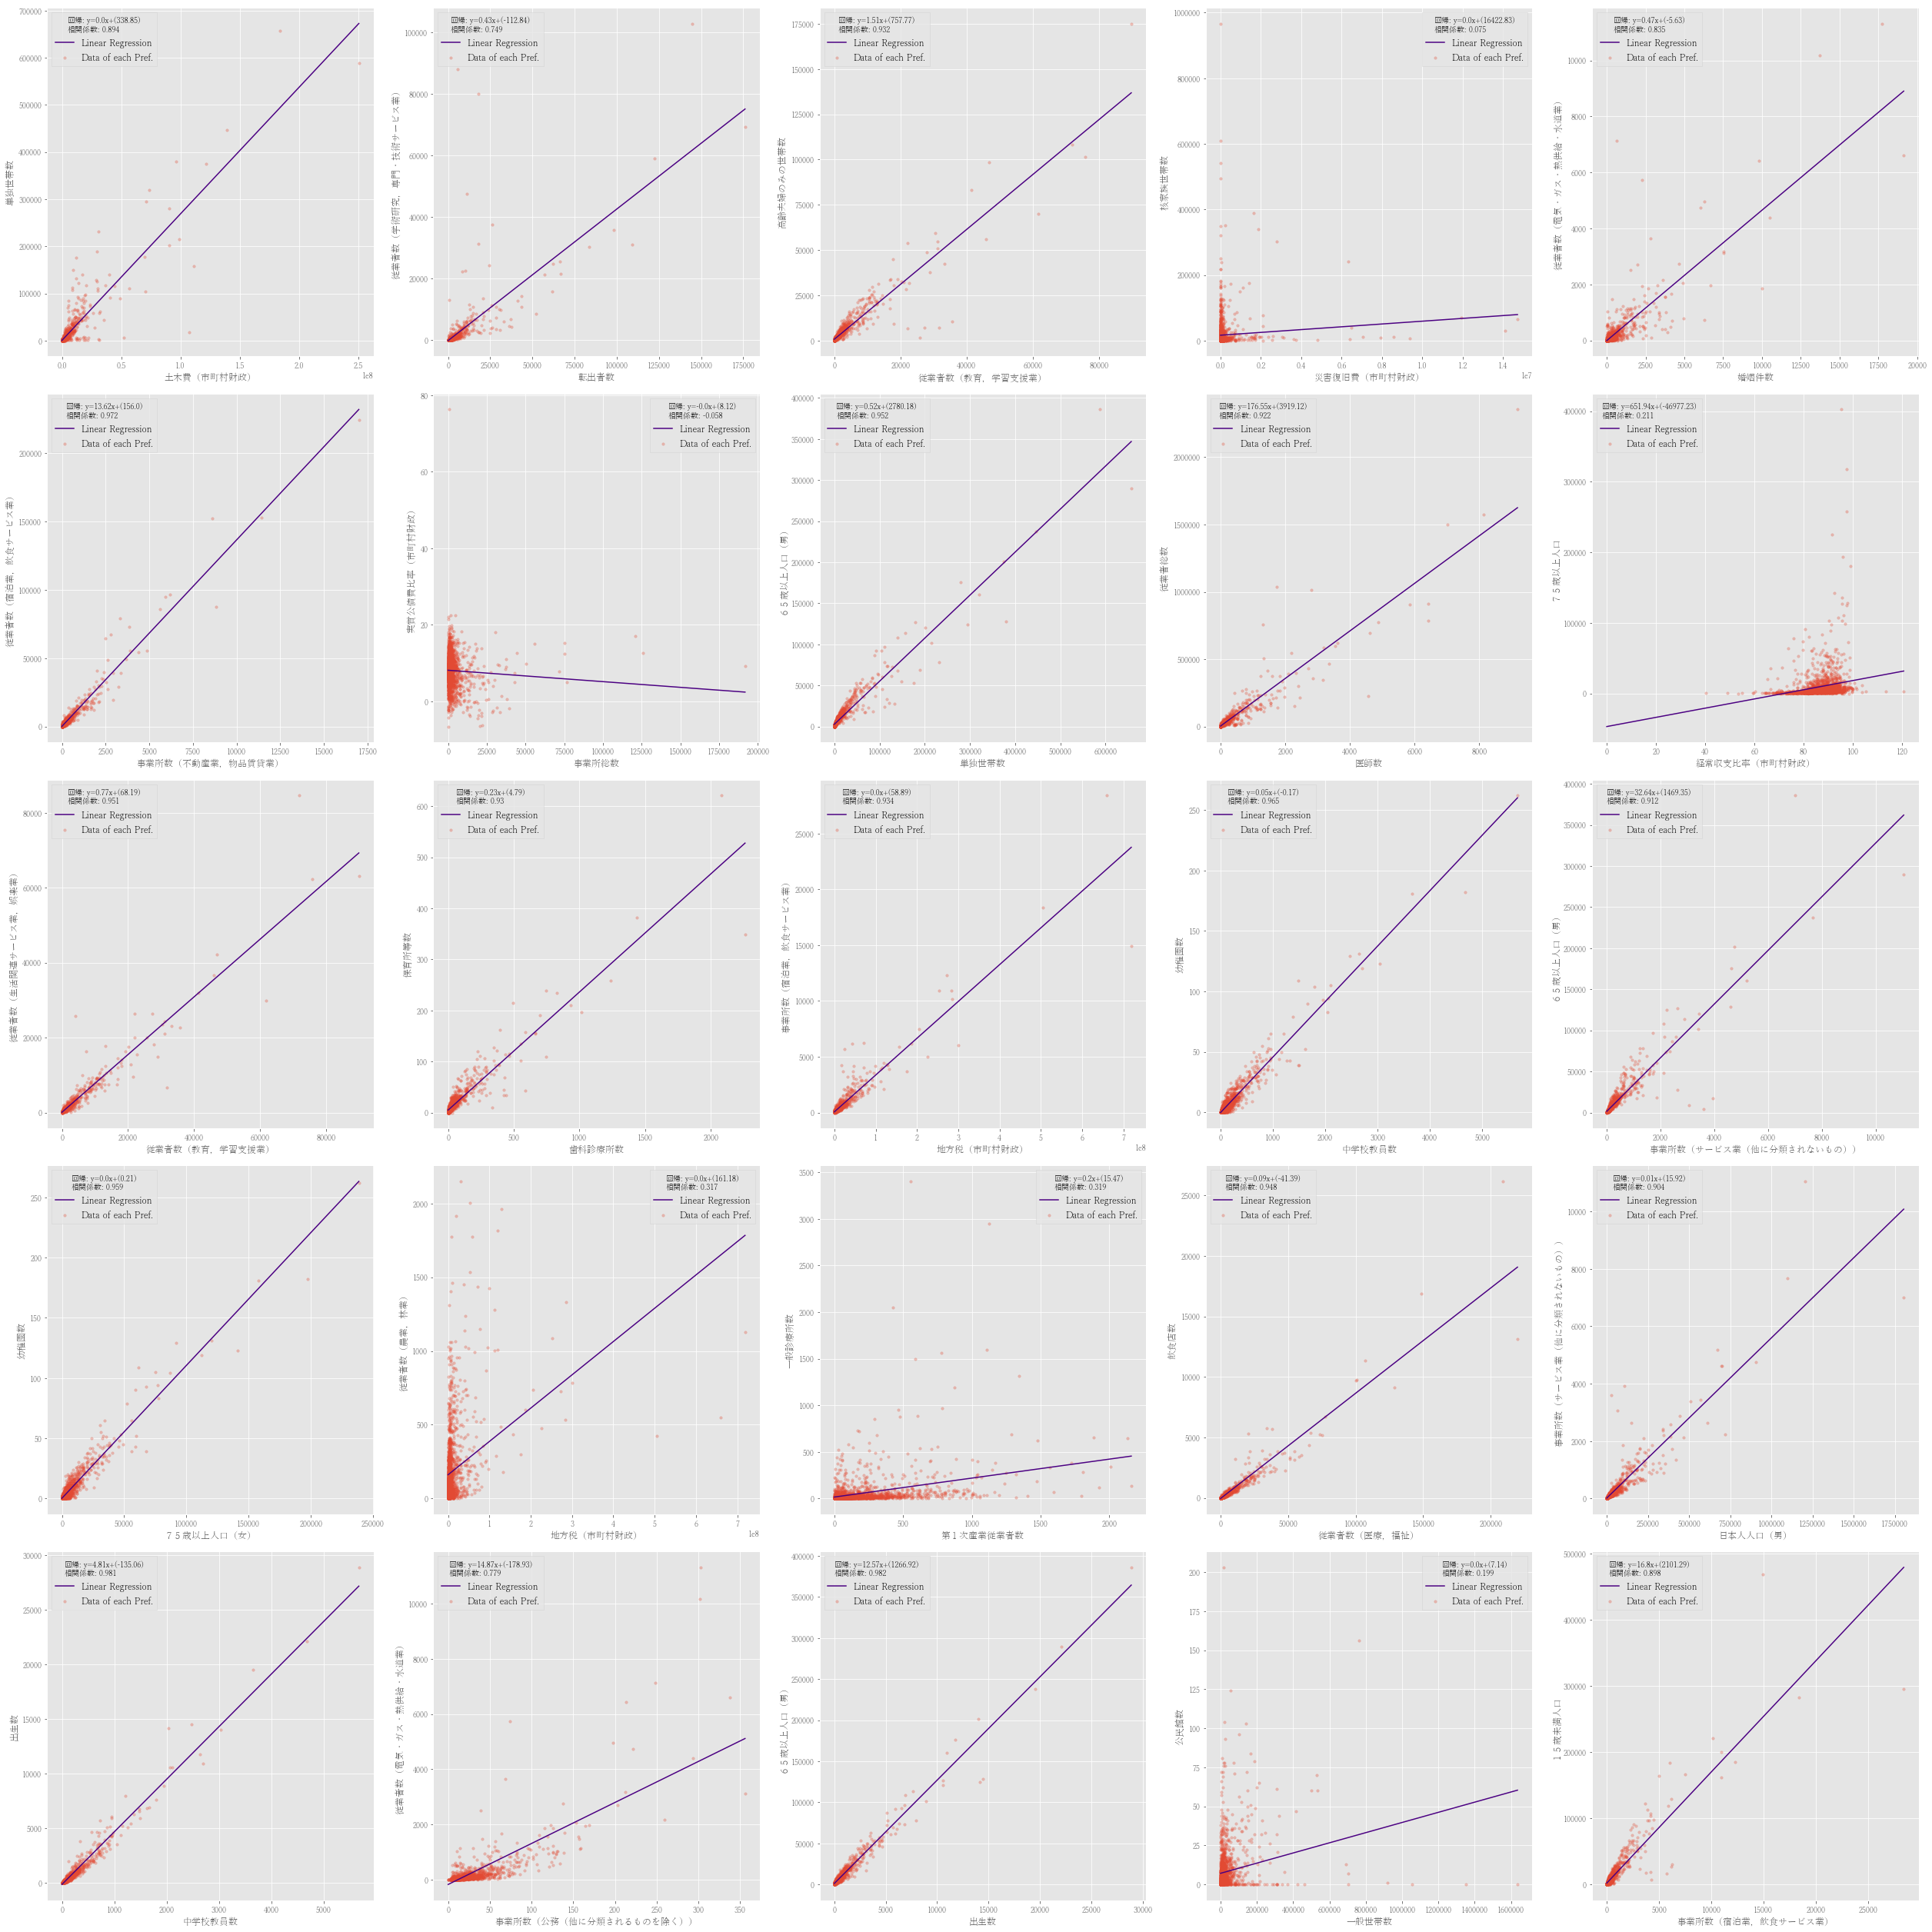

In [75]:
random_scatter(5, 5)

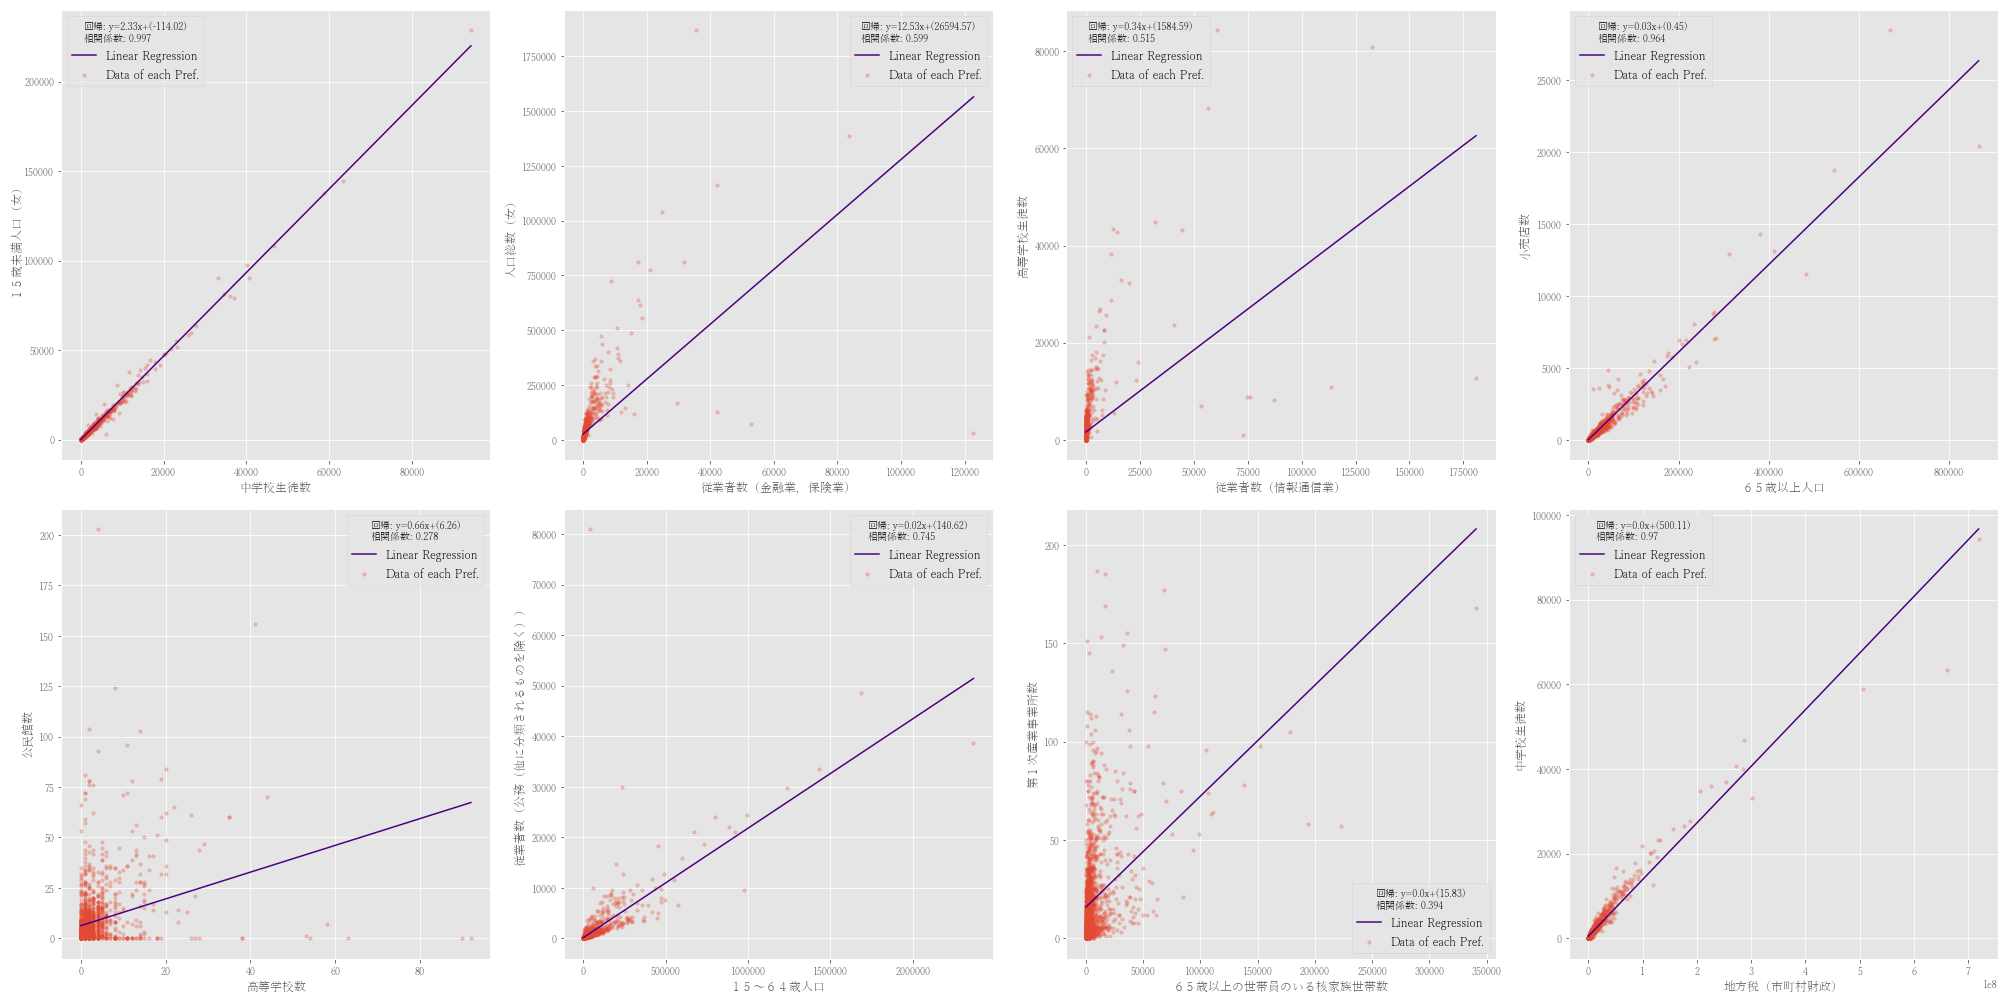

In [77]:
random_scatter(2, 4)

In [ ]:
random_scatter